# Import Modules

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import datetime

# Load data file

In [30]:
file_name = "vasopressIn_dataset.xlsx" # within same folder as notebook file
pre_sheet_name = 'Pre Restriction'
post_sheet_name = 'Post Restriction'

# Read file into a pandas DataFrame
df_pre = pd.read_excel(file_name, sheet_name = pre_sheet_name) # pre restriction dataframe
df_post = pd.read_excel(file_name, sheet_name = post_sheet_name) # post restriction dataframe

# Cleaning Dataset

## Cleaning goals:
* drop all empty columns and rows
* drop empty columns for rate pressor, vasopressIN columns
* Change data types to correct type for analysis later
* standardize time/date formats
* Remember, if time difference value is negative, drop value from dataset

In [31]:
# Drop empty columns to clean up df
#df = df.reset_index().dropna(axis = 1, how = 'all'
df_pre = df_pre.reset_index().dropna(axis = 1, how = 'all')
df_post = df_post.reset_index().dropna(axis = 1, how = 'all')

In [32]:
# Check number of rows
print(len(df_pre))
print(len(df_post))

53
37


In [33]:
# Drop empty rows
df_pre = df_pre.dropna(axis = 0, how = 'all')
df_post = df_post.dropna(axis = 0, how = 'all')

In [34]:
# Check if any rows were dropped
print(len(df_pre))
print(len(df_post))

51
37


In [35]:
df_pre.head(n=5)

,Age,Sex,TBW (kg),Fluid Challenge?,Pressor,Dose Pressor,Rate Pressor,VasopressIN Dose (U/min),VasopressIN Date,VasopressIN Admin Time,Vasopressin Stop Date,Vasopressin Stop Time,Discontinue Date,Discontinue Time
0,65,M,109.2,1.0,NE,12,22.5,0.04,2017-02-24 00:00:00,1004,NaT,NaN,02/26/2017,2017-02-26 08:16:00.000
1,83,F,55.3,1.0,NE,12,NaN,0.04,2017-02-27 00:00:00,1138,2017-02-28,1349.0,02/28/2017,2017-02-28 05:45:00.000
2,53,F,111.7,1.0,NE,3,5.6,0.04,2017-02-28 00:00:00,545,2017-03-02,900.0,03/02/2017,2017-03-02 14:34:00.000
3,61,M,75.2,1.0,NE,8,15.0,0.04,2017-03-12 00:00:00,1100,2017-03-17,1500.0,03/17/2017,2017-03-17 13:42:59.999
4,84,F,90,1.0,PE,180,67.5,0.04,2017-03-16 00:00:00,1514,2017-03-19,700.0,03/20/2017,2017-03-20 02:29:59.999


In [36]:
df_post.head(n=5)

,Age,Sex,TBW (kg),Fluid Challenge?,Pressor,Dose Pressor mcg/min,Rate Pressor,VasopressIN Dose (U/min),VasopressIN Date,VasopressIN Admin Time,Vasopressin Stop Date,Vasopressin Stop Time,Discontinue Date,Discontinue Time
0,64.0,M,82.0,1.0,NE,30.0,56.3,0.04,2018-09-03,33.0,NaT,NaN,09/04/2018,2018-09-04 09:14:00.000
1,NaN,NaN,NaN,1.0,NE,19.0,35.6,0.04,2018-09-04,2217.0,2018-09-04,1300.0,09/07/2018,2018-09-07 10:42:59.999
2,91.0,F,74.0,0.0,NE,10.0,18.8,0.04,2018-09-08,1156.0,2018-09-09,800.0,09/09/2018,2018-09-09 08:25:00.000
3,43.0,M,79.3,1.0,NE,30.0,56.3,0.04,2018-09-08,1049.0,2018-09-11,1600.0,09/10/2018,2018-09-10 18:59:59.999
4,43.0,M,79.3,1.0,NE,10.0,4.7,0.04,2018-09-11,303.0,2018-09-11,1600.0,09/13/2018,2018-09-13 09:50:59.999


In [37]:
df_pre.dtypes # check datatypes of both dataframes

Age                                 object
Sex                                 object
TBW (kg)                            object
Fluid Challenge?                   float64
Pressor                             object
Dose Pressor                        object
Rate Pressor                       float64
VasopressIN Dose (U/min)            object
VasopressIN Date                    object
VasopressIN Admin Time              object
Vasopressin Stop Date       datetime64[ns]
Vasopressin Stop Time              float64
Discontinue Date                    object
Discontinue Time            datetime64[ns]
dtype: object

In [38]:
df_post.dtypes

Age                                float64
Sex                                 object
TBW (kg)                           float64
Fluid Challenge?                   float64
Pressor                             object
Dose Pressor mcg/min               float64
Rate Pressor                       float64
VasopressIN Dose (U/min)           float64
VasopressIN Date            datetime64[ns]
VasopressIN Admin Time             float64
Vasopressin Stop Date       datetime64[ns]
Vasopressin Stop Time              float64
Discontinue Date                    object
Discontinue Time            datetime64[ns]
dtype: object

In [12]:
df_pre['Vasopressin Stop Time'] = pd.to_datetime(df_pre['Vasopressin Stop Time'], format='%-H%M', errors='coerce')

In [14]:
# Change column data type to float
df_pre['Rate Pressor'] = df_pre['Rate Pressor'].astype(float, errors = 'ignore')

In [16]:
# Change column data type to float
df_post['Rate Pressor'] = df_post['Rate Pressor'].astype(float, errors = 'ignore')

In [24]:
# Define function to do convert on time columns
def parse_time(string):
    hour = string[:2]
    min = string[2:]
    result = hour + ':' + min
    return datetime.datetime.strptime(result, '%H:%M').time()

In [ ]:
# Define function to subtract time and return elasped value
def time_diff(start_time, end_time):
    if start_time > end_time:
        break
    else:
        hours = (end_time.hour - start_time.hour)*60
        minutes = (end_time.minute)

## Next steps for sorting:
* New dataframes: drop empty values for start or stop times

# Plots

* box plot for repressor rates, post and pre
* histogram too
* quartile and stats values for pre and post

In [41]:
# Print values for rate pressor pre restriction
df_pre['Rate Pressor'].describe()

count     41.000000
mean      65.724390
std       51.479602
min        0.000000
25%       37.500000
50%       56.300000
75%       93.300000
max      281.000000
Name: Rate Pressor, dtype: float64

In [42]:
# print values for rate pressor post restriction
df_post['Rate Pressor'].describe()

count     32.000000
mean      43.838750
std       30.542405
min        1.900000
25%       18.800000
50%       39.400000
75%       56.300000
max      103.000000
Name: Rate Pressor, dtype: float64

In [43]:
# declare x variable for following plots
x_pre = df_pre['Rate Pressor']
x_post = df_post['Rate Pressor']

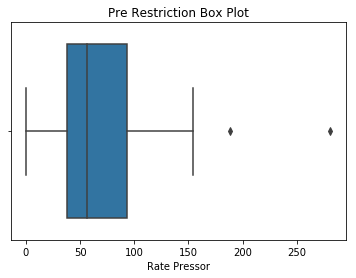

In [55]:
# box plot for pre

pre_box = sns.boxplot(x=x_pre).set_title('Pre Restriction Box Plot')
#pre_box.savefig('pre_restriction_box.png')
plt.savefig('pre_restriction_box.png')

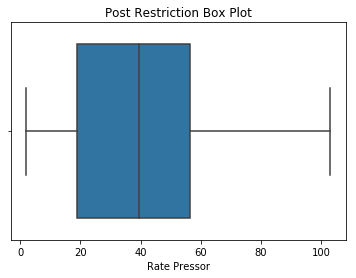

In [57]:
# box plot for post
pos_box = sns.boxplot(x=x_post).set_title('Post Restriction Box Plot')
plt.savefig('post_restriction_box.png')

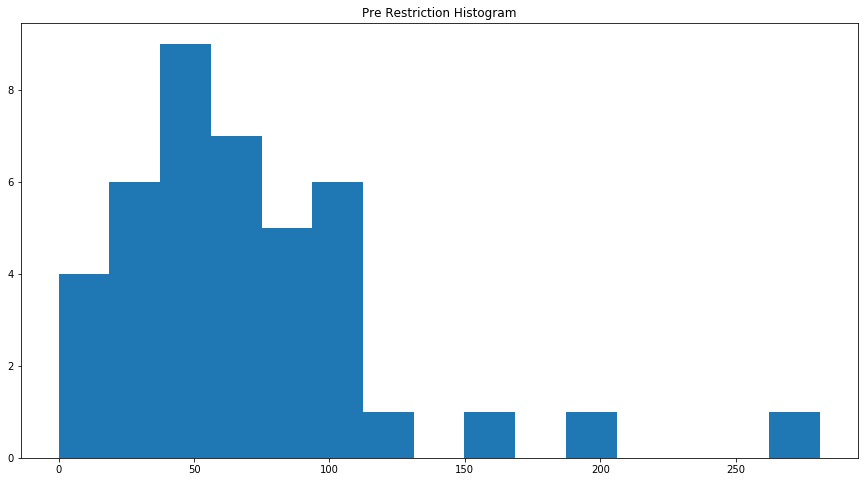

<Figure size 1080x576 with 0 Axes>

In [85]:
# histogram pre
plt.hist(x_pre, bins = 15)
plt.title('Pre Restriction Histogram')
plt.rcParams['figure.figsize'] = [15,8]
plt.show()
plt.savefig('pre_restriction_histogram.png')

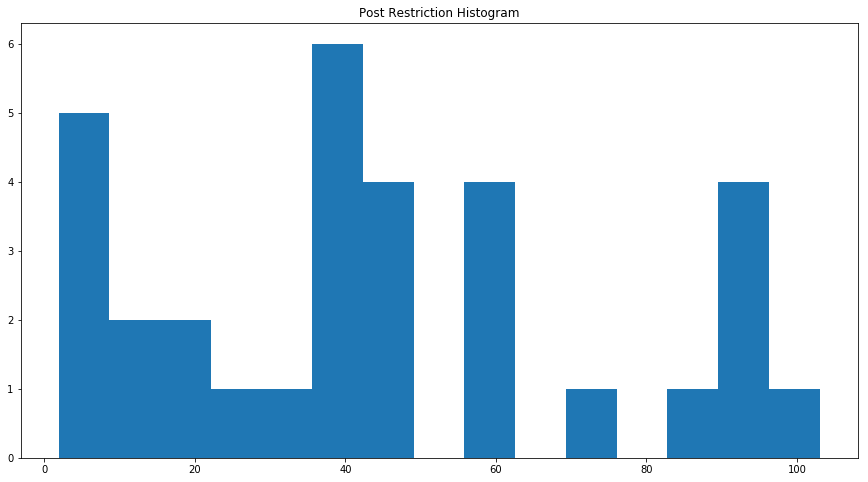

<Figure size 1080x576 with 0 Axes>

In [83]:
# histogram post
plt.hist(x_post, bins = 15)
plt.title('Post Restriction Histogram')
plt.show()
plt.savefig('post_restriction_histogram.png')